#**HURRICANE CHAOS GAME**

PART I
```
Miriam Nohemi López Cruz
Vrije Universiteit Brussel, Belgium
Email: miriam.nohemi.lopez.cruz@vub.be
```

In [ ]:
# Only needed in Google Collab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Only needed in Google Collab
path = "/content/drive/MyDrive/"

In [ ]:
# Import the required packages
from PIL import Image
from scipy.stats import spearmanr, f_oneway
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **DATASETS**

In [ ]:
# Load both the clutter-metrics evaluated images dataset and the game evaluation and difficulty parameters dataset
results = pd.read_csv(path+'results.csv', index_col=0)
game_data = pd.read_csv(path+'24.05.27 - HCH query results.csv')

**a. Clutter-metrics evaluated images.**

In [ ]:
# Basic information about the dataset.
results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10023 entries, 0 to 10022
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10023 non-null  int64  
 1   JPEG_size           10023 non-null  int64  
 2   CONTOUR_DENSITY     10023 non-null  float64
 3   SUBBAND_ENTROPY     10023 non-null  float64
 4   FEATURE_CONGESTION  10023 non-null  float64
 5   FIG_GROUND          10023 non-null  float64
 6   CONTOUR_CONGESTION  10023 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 626.4 KB


In [ ]:
results.head()

,id,JPEG_size,CONTOUR_DENSITY,SUBBAND_ENTROPY,FEATURE_CONGESTION,FIG_GROUND,CONTOUR_CONGESTION
0,1000698,143042,0.0189,2.5820,3.1051,0.7330,0.5545
1,1006767,133233,0.0172,2.4407,2.7650,0.7064,0.5636
2,1012303,153711,0.0218,2.9606,3.2066,0.7015,0.4331
3,104454,82589,0.0088,2.0572,2.3361,0.7858,0.4314
4,1055102,139979,0.0203,2.6423,2.6218,0.6787,0.5858


**b. Game database**

In [ ]:
# Basic information about the dataset.
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8537 entries, 0 to 8536
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        8537 non-null   int64  
 1   start_date                8537 non-null   object 
 2   end_date                  8537 non-null   object 
 3   wrong_selection           8537 non-null   int64  
 4   hint_used                 8537 non-null   object 
 5   hints_count               8537 non-null   int64  
 6   evaluation                8537 non-null   int64  
 7   evaluation_details        8537 non-null   object 
 8   objects                   8537 non-null   int64  
 9   distractors               8537 non-null   int64  
 10  background                8537 non-null   object 
 11  theme                     8537 non-null   object 
 12  perspective               8537 non-null   object 
 13  rotate_images             8537 non-null   object 
 14  max_over

In [ ]:
game_data['general_difficulty'].value_counts()

,count
general_difficulty,
41,420
19,405
20,385
0,372
35,356
71,320
28,319
55,308
34,278


In [ ]:
game_data.head()

,id,start_date,end_date,wrong_selection,hint_used,hints_count,evaluation,evaluation_details,objects,distractors,...,rotate_images,max_overlap,min_distance_from_border,min_size,max_size,earned_stars,max_stars_possible,ended_early,general_difficulty,adaptive
0,616793,2022-03-07 10:23:42,2022-03-07 10:24:11,0,f,0,1,time (29s) - OK &,3,1,...,f,0.0,143,100,300,3,6,f,43,f
1,616813,2022-03-07 10:24:27,2022-03-07 10:24:41,0,f,0,1,time (14s) - OK &,3,1,...,f,0.0,143,100,300,3,6,f,43,f
2,616833,2022-03-07 10:24:52,2022-03-07 10:25:10,0,f,0,1,time (18s) - OK &,3,1,...,f,0.0,143,100,300,3,6,f,43,f
3,616879,2022-03-07 10:26:03,2022-03-07 10:26:17,0,f,0,1,time (14s) - OK &,3,1,...,f,0.0,143,100,300,3,6,f,43,f
4,616900,2022-03-07 10:26:29,2022-03-07 10:26:44,0,f,0,1,time (15s) - OK &,3,1,...,f,0.0,143,100,300,3,6,f,43,f


Max. and min. number of objects and distractors:

In [ ]:
print("Info about the game data:\n Max. number of objects = " + str(game_data["objects"].max()) + "\n Min. number of objects = "
      + str(game_data["objects"].min()) + "\n Max. number of distractors = " + str(game_data["distractors"].max()) + "\n Min. number of distractors = "
      + str(game_data["distractors"].min()))

Info about the game data:
 Max. number of objects = 10
 Min. number of objects = 3
 Max. number of distractors = 30
 Min. number of distractors = 1


In [ ]:
#Verify if there are repeated images
game_data["id"].nunique()

8537

In [ ]:
#Verify if there are children who turned off the laptop or tablet before finishing the game, as these rows should be remove.
print(game_data["ended_early"].nunique())
# Check unique values in the 'ended_early' column
print(game_data['ended_early'].unique())

1
['f']


# **DATA PRE-PROCESSING**

Merging the dataframes for further analysis and to apply our ML models


```
When merging both datasets, the final number of entries is 7574, which is the number of entries of the game database (not all the images from which we have clutter metrics data available have been included in that db).
```


In [ ]:
#Merging both datasets
merged_df = results.merge(game_data,on='id')

#Add a new "duration" column from start and end date
merged_df[['start_date', 'end_date']] = merged_df[['start_date', 'end_date']].apply(lambda x: pd.to_datetime(x))

#Obtain the duration in seconds from the deduction of the start time to the end time
merged_df["duration"]=(merged_df["end_date"]-merged_df["start_date"]).astype('timedelta64[s]').astype('int')

#Separating the difficulty level from the background column (dataset b)
merged_df["background"] = merged_df["background"].str.replace('\\','/')

#Use the '/' symbol as a separator between the difficulty and the background
merged_df[["background_difficulty","background"]] = merged_df["background"].str.split('/',expand=True)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7574 entries, 0 to 7573
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        7574 non-null   int64         
 1   JPEG_size                 7574 non-null   int64         
 2   CONTOUR_DENSITY           7574 non-null   float64       
 3   SUBBAND_ENTROPY           7574 non-null   float64       
 4   FEATURE_CONGESTION        7574 non-null   float64       
 5   FIG_GROUND                7574 non-null   float64       
 6   CONTOUR_CONGESTION        7574 non-null   float64       
 7   start_date                7574 non-null   datetime64[ns]
 8   end_date                  7574 non-null   datetime64[ns]
 9   wrong_selection           7574 non-null   int64         
 10  hint_used                 7574 non-null   object        
 11  hints_count               7574 non-null   int64         
 12  evaluation          

As the next step consist on transforming and removing some columns, we will store particular dataframes, depending on the time of information they provide.

In [ ]:
#Df of the parameters that are used for evaluation
evaluation_params = merged_df[["duration", "hint_used", "hints_count", "wrong_selection"]]

#Df of the parameters that describe the "difficulty" of a level
difficulty_params = merged_df[['objects', 'distractors', 'background', 'background_difficulty','perspective', 'rotate_images', 'max_overlap', 'min_distance_from_border', 'min_size', 'max_size']]

#List of metrics
metrics = ['JPEG_size', 'CONTOUR_DENSITY', 'SUBBAND_ENTROPY', 'FEATURE_CONGESTION', 'FIG_GROUND','CONTOUR_CONGESTION']

We will remove start_date, end_date, duration, hint_used, hints_count and wrong_selection, as these parameters are used directly to arrived to the estimated evaluation.

ended_early indicates wether the child interrupt the game.
max_stars_possible is an indication of the numer of...

In [ ]:
# Replace some of the categorical non numerical values to numerical values and change their data type.
merged_df[["perspective", "rotate_images", "adaptive", "background_difficulty"]] = merged_df[["perspective", "rotate_images", "adaptive", "background_difficulty"]].apply(lambda col: col.replace({"f": "0", "t": "1"}))
merged_df[["perspective", "rotate_images", "adaptive", "background_difficulty"]] = merged_df[["perspective", "rotate_images", "adaptive", "background_difficulty"]].apply(lambda col: col.astype(int))

In [ ]:
merged_df.head()

,id,JPEG_size,CONTOUR_DENSITY,SUBBAND_ENTROPY,FEATURE_CONGESTION,FIG_GROUND,CONTOUR_CONGESTION,start_date,end_date,wrong_selection,...,min_distance_from_border,min_size,max_size,earned_stars,max_stars_possible,ended_early,general_difficulty,adaptive,duration,background_difficulty
0,1000698,143042,0.0189,2.5820,3.1051,0.7330,0.5545,2022-05-11 09:51:53,2022-05-11 09:52:56,0,...,71,86,215,21,24,f,24,0,63,0
1,1006767,133233,0.0172,2.4407,2.7650,0.7064,0.5636,2022-05-11 13:09:44,2022-05-11 13:12:23,44,...,71,100,180,14,27,f,62,1,159,90
2,1012303,153711,0.0218,2.9606,3.2066,0.7015,0.4331,2022-05-12 14:59:50,2022-05-12 15:01:01,1,...,71,100,180,24,27,f,62,1,71,90
3,1055102,139979,0.0203,2.6423,2.6218,0.6787,0.5858,2022-05-19 15:09:28,2022-05-19 15:10:28,3,...,71,100,180,13,24,f,62,1,60,90
4,1087085,108292,0.0130,2.3357,2.4241,0.6778,0.4967,2022-05-24 13:41:07,2022-05-24 13:41:50,1,...,143,100,180,15,18,f,34,1,43,90


In [ ]:
# The names of the columns will be change at this step only with the objective to improve the design of our graphs
df_correlation = merged_df.rename(columns={"JPEG_size": "JPEG", "CONTOUR_DENSITY": "EDGE DENSITY", "SUBBAND_ENTROPY": "SUBBAND ENTROPY", "FEATURE_CONGESTION": "FEATURE CONGESTION", "FIG_GROUND": "FIG. GROUND CONTRAST", "CONTOUR_CONGESTION": "CONTOUR CONGESTION", "background_difficulty":"background difficulty", "general_difficulty":"general difficulty", "hints_count":"hints count", "max_overlap":"max. overlap", "min_distance_from_border":"min. distance from border"})

In [ ]:
df_correlation.head()

,id,JPEG,EDGE DENSITY,SUBBAND ENTROPY,FEATURE CONGESTION,FIG. GROUND CONTRAST,CONTOUR CONGESTION,start_date,end_date,wrong_selection,...,min. distance from border,min_size,max_size,earned_stars,max_stars_possible,ended_early,general difficulty,adaptive,duration,background difficulty
0,1000698,143042,0.0189,2.5820,3.1051,0.7330,0.5545,2022-05-11 09:51:53,2022-05-11 09:52:56,0,...,71,86,215,21,24,f,24,0,63,0
1,1006767,133233,0.0172,2.4407,2.7650,0.7064,0.5636,2022-05-11 13:09:44,2022-05-11 13:12:23,44,...,71,100,180,14,27,f,62,1,159,90
2,1012303,153711,0.0218,2.9606,3.2066,0.7015,0.4331,2022-05-12 14:59:50,2022-05-12 15:01:01,1,...,71,100,180,24,27,f,62,1,71,90
3,1055102,139979,0.0203,2.6423,2.6218,0.6787,0.5858,2022-05-19 15:09:28,2022-05-19 15:10:28,3,...,71,100,180,13,24,f,62,1,60,90
4,1087085,108292,0.0130,2.3357,2.4241,0.6778,0.4967,2022-05-24 13:41:07,2022-05-24 13:41:50,1,...,143,100,180,15,18,f,34,1,43,90


# **Correlation Analysis**

**Objective:**
Find the correlation between
1. Each of the metrics
2. The difficulty parameters set by the game designers and the metrics.

In [ ]:
# Select relevant columns for correlation
clutter_metrics = ['JPEG', 'EDGE DENSITY', 'SUBBAND ENTROPY',
                   'FEATURE CONGESTION', 'FIG. GROUND CONTRAST', 'CONTOUR CONGESTION']
game_parameters = ['objects', 'distractors', 'duration', 'hints count', 'max. overlap', 'min. distance from border']
game_parameters_ordinal = ['general difficulty', 'background difficulty', 'evaluation']


#Df of the parameters that are used for evaluation
evaluation_params = ['duration', 'hints count', 'evaluation']

#Df of the parameters that describe the "difficulty" of a level
difficulty_params = ['objects', 'background difficulty','general difficulty']

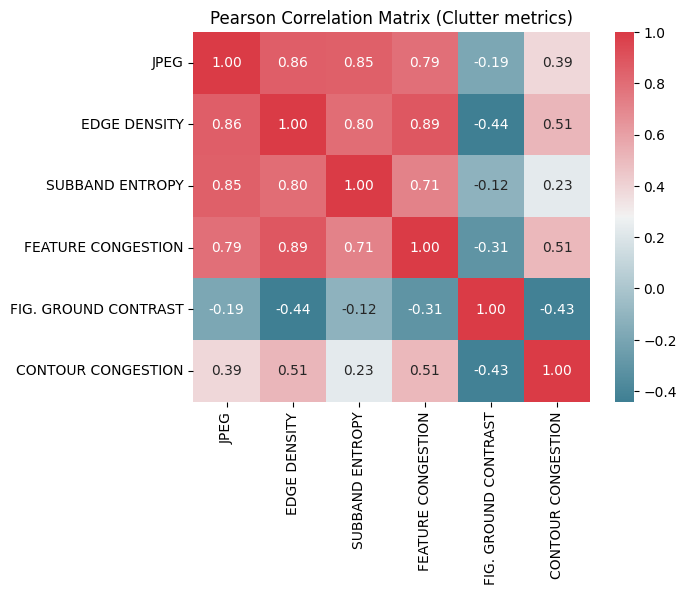

In [ ]:
# Correlation matrix for clutter metrics and evaluation
correlation_matrix = df_correlation[clutter_metrics].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f',
            cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Pearson Correlation Matrix (Clutter metrics)')
plt.show()

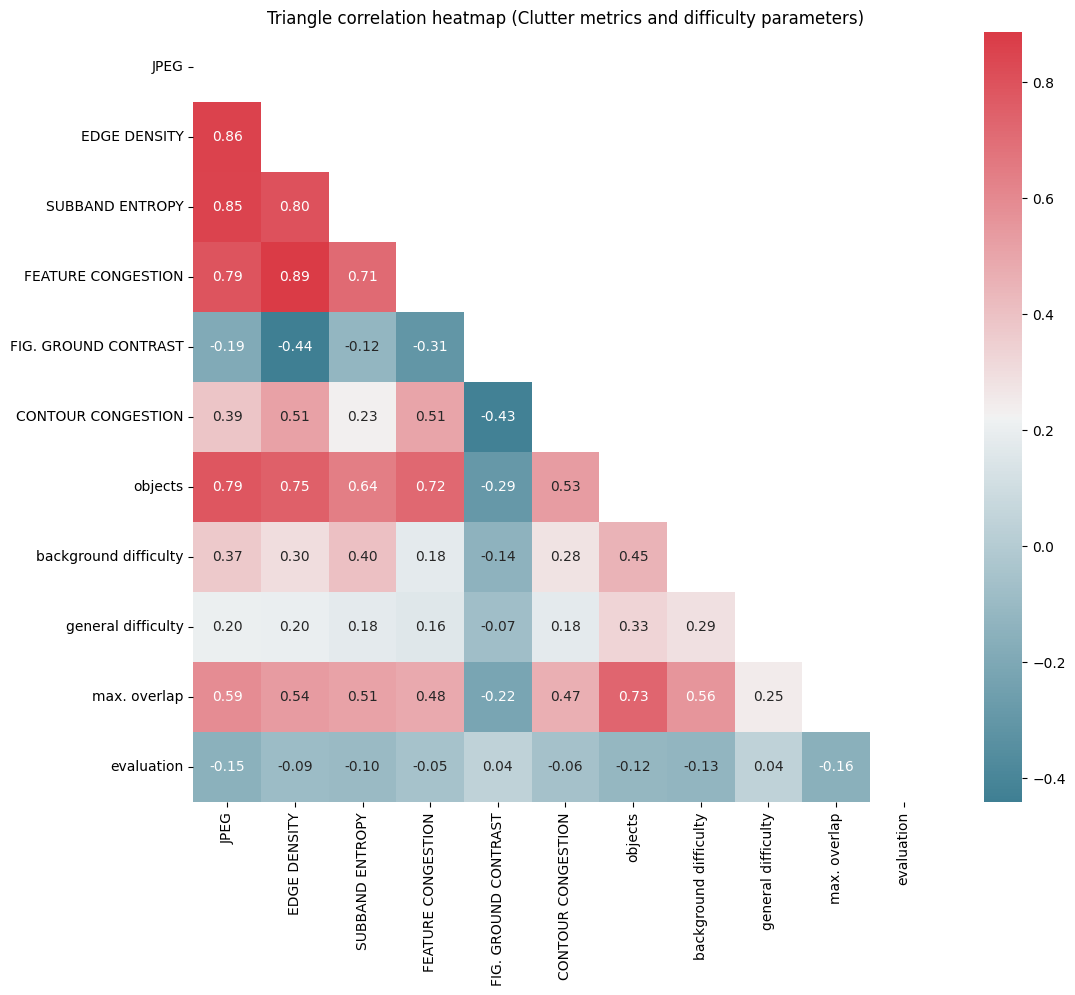

In [ ]:
# Correlation matrix for clutter metrics and difficulty parameters
correlation_matrix = df_correlation[clutter_metrics + difficulty_params + ['max. overlap']+['evaluation']].corr()

# Applying mask
mask = np.triu(np.ones_like(correlation_matrix.corr()))

# Plotting a triangle correlation heatmap
plt.figure(figsize=(12, 10))
dataplot = sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap=sns.diverging_palette(220, 10, as_cmap=True))

plt.title('Triangle correlation heatmap (Clutter metrics and difficulty parameters)')
plt.show()

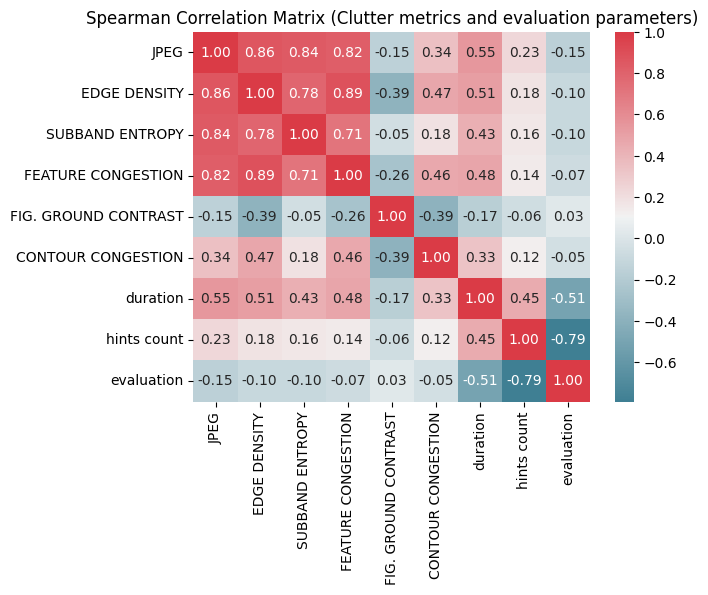

In [ ]:
# Correlation matrix for clutter metrics and evaluation
# Correlation of 'duration' with the rest of the parameters wasn't that strong with Pearson correlation, so we use Spearman instead.
correlation_matrix = df_correlation[clutter_metrics+ evaluation_params].corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, fmt='.2f',
            cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Spearman Correlation Matrix (Clutter metrics and evaluation parameters)')
plt.show()

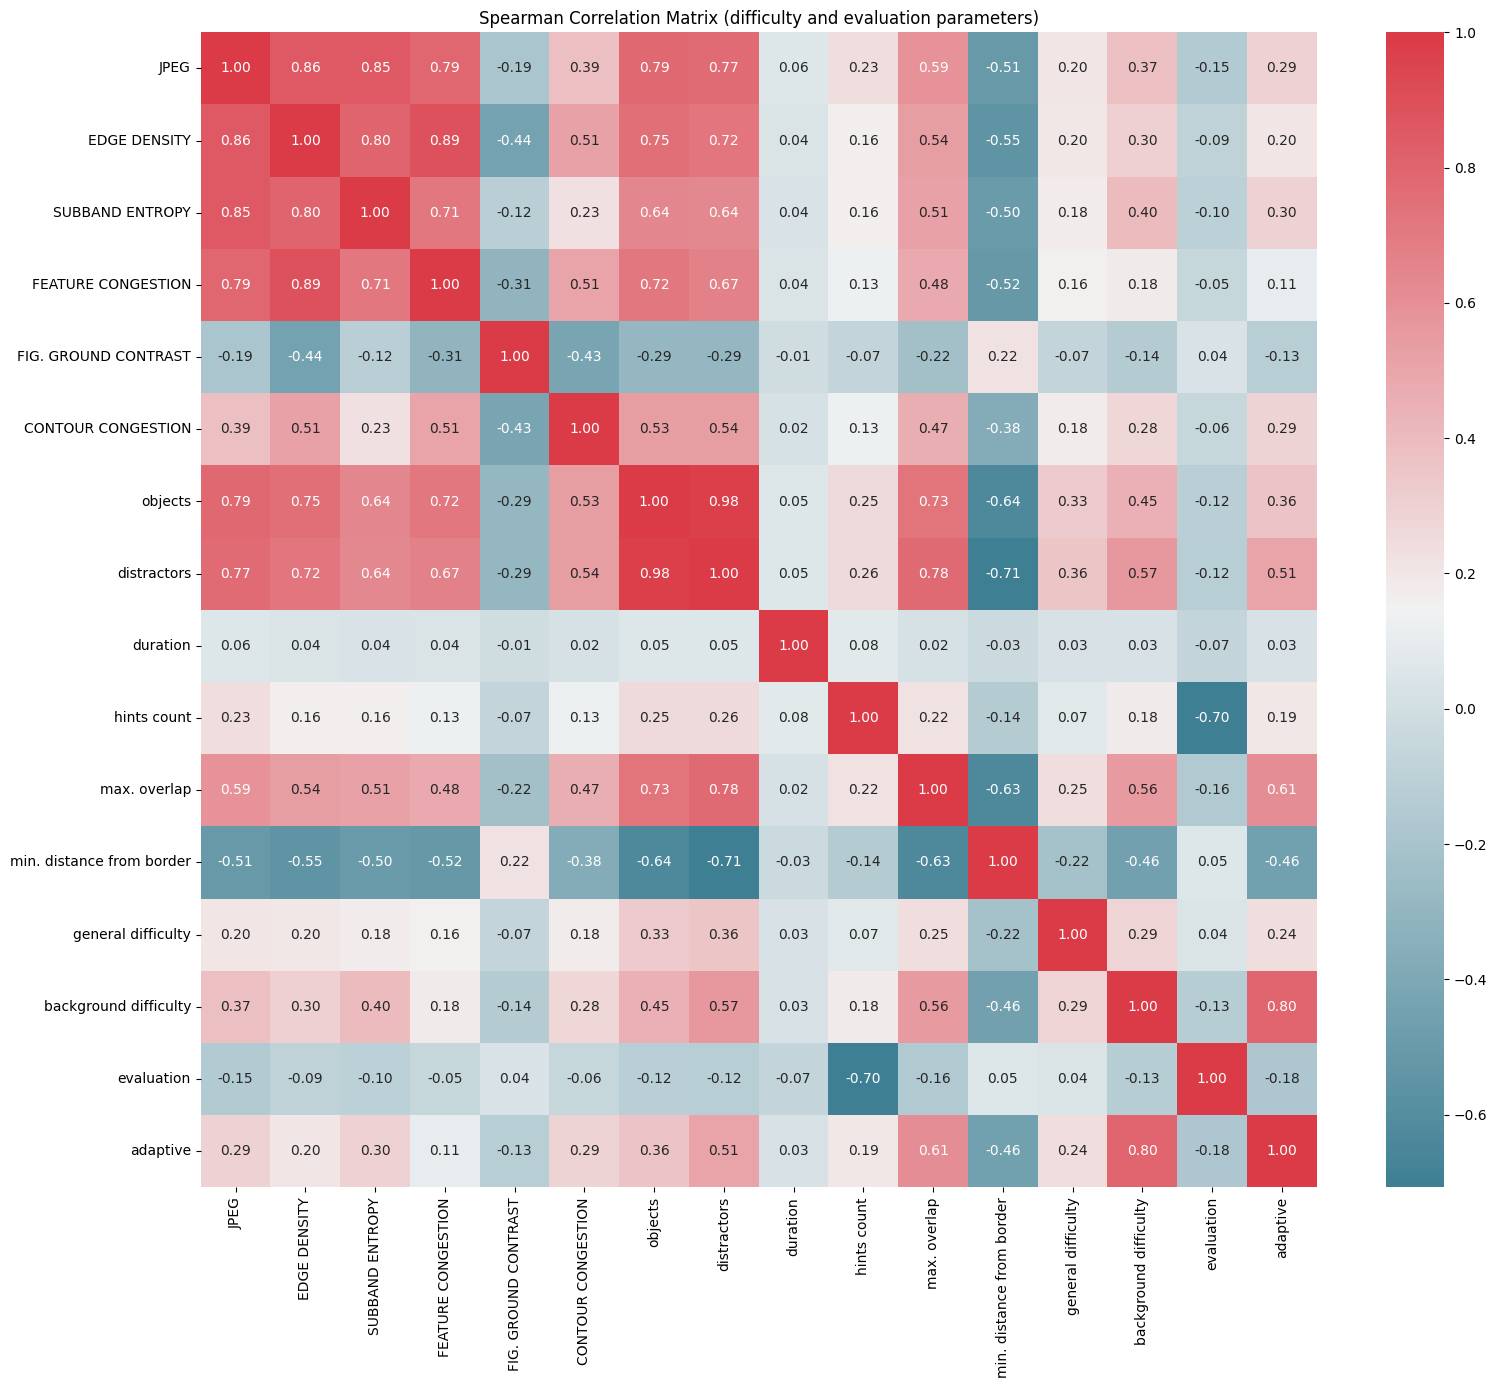

In [ ]:
# Correlation matrix for difficulty parameters and evaluation parameters
plt.figure(figsize=(18, 15))
correlation_matrix = df_correlation[clutter_metrics + game_parameters + game_parameters_ordinal + ['adaptive']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f',
            cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Spearman Correlation Matrix (difficulty and evaluation parameters)')
plt.show()


# **Is data normalized?**

In [ ]:
## Check for normalization of numerical features in merged_df
from scipy.stats import normaltest

numerical_features = merged_df.select_dtypes(include=np.number).columns

for feature in numerical_features:
    k2, p = normaltest(merged_df[feature])
    print(f"Feature: {feature}")
    print(f"  K^2 statistic: {k2:.3f}")
    print(f"  p-value: {p:.3f}")
    alpha = 0.05
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("  The null hypothesis can be rejected. The data is likely not normally distributed.")
    else:
        print("  The null hypothesis cannot be rejected. The data may come from a normal distribution.")
    print("-" * 20)

Feature: id
  K^2 statistic: 3452.628
  p-value: 0.000
  The null hypothesis can be rejected. The data is likely not normally distributed.
--------------------
Feature: JPEG_size
  K^2 statistic: 20.278
  p-value: 0.000
  The null hypothesis can be rejected. The data is likely not normally distributed.
--------------------
Feature: CONTOUR_DENSITY
  K^2 statistic: 51.302
  p-value: 0.000
  The null hypothesis can be rejected. The data is likely not normally distributed.
--------------------
Feature: SUBBAND_ENTROPY
  K^2 statistic: 143.013
  p-value: 0.000
  The null hypothesis can be rejected. The data is likely not normally distributed.
--------------------
Feature: FEATURE_CONGESTION
  K^2 statistic: 223.162
  p-value: 0.000
  The null hypothesis can be rejected. The data is likely not normally distributed.
--------------------
Feature: FIG_GROUND
  K^2 statistic: 430.808
  p-value: 0.000
  The null hypothesis can be rejected. The data is likely not normally distributed.
-----------

An ANOVA test might not be reliable since the data is not normally distributed.

## **Distribution and variance of clutter measurements:**

In [ ]:
#Scale the metrics for better comparison and visualization of outliers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_copy = df_correlation.copy()
df_copy[clutter_metrics] = scaler.fit_transform(df_copy[clutter_metrics])

In [ ]:
df_copy.head()

,id,JPEG,EDGE DENSITY,SUBBAND ENTROPY,FEATURE CONGESTION,FIG. GROUND CONTRAST,CONTOUR CONGESTION,start_date,end_date,wrong_selection,...,min. distance from border,min_size,max_size,earned_stars,max_stars_possible,ended_early,general difficulty,adaptive,duration,background difficulty
0,1000698,1.294290,0.962244,0.607594,1.484900,0.274731,0.758654,2022-05-11 09:51:53,2022-05-11 09:52:56,0,...,71,86,215,21,24,f,24,0,63,0
1,1006767,0.902719,0.621488,0.229049,0.667761,-0.226040,0.854516,2022-05-11 13:09:44,2022-05-11 13:12:23,44,...,71,100,180,14,27,f,62,1,159,90
2,1012303,1.720191,1.543532,1.621868,1.728769,-0.318287,-0.520206,2022-05-12 14:59:50,2022-05-12 15:01:01,1,...,71,100,180,24,27,f,62,1,71,90
3,1055102,1.172016,1.242866,0.769138,0.323703,-0.747519,1.088376,2022-05-19 15:09:28,2022-05-19 15:10:28,3,...,71,100,180,13,24,f,62,1,60,90
4,1087085,-0.092914,-0.220378,-0.052247,-0.151300,-0.764462,0.149773,2022-05-24 13:41:07,2022-05-24 13:41:50,1,...,143,100,180,15,18,f,34,1,43,90


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7574 entries, 0 to 7573
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         7574 non-null   int64         
 1   JPEG                       7574 non-null   float64       
 2   EDGE DENSITY               7574 non-null   float64       
 3   SUBBAND ENTROPY            7574 non-null   float64       
 4   FEATURE CONGESTION         7574 non-null   float64       
 5   FIG. GROUND CONTRAST       7574 non-null   float64       
 6   CONTOUR CONGESTION         7574 non-null   float64       
 7   start_date                 7574 non-null   datetime64[ns]
 8   end_date                   7574 non-null   datetime64[ns]
 9   wrong_selection            7574 non-null   int64         
 10  hint_used                  7574 non-null   object        
 11  hints count                7574 non-null   int64         
 12  evalua

**Distribution and variance of clutter measurements:**



Summary statistics

In [ ]:
stats_eval = df_copy.groupby('evaluation')[clutter_metrics].mean()
print(stats_eval)

                JPEG  EDGE DENSITY  SUBBAND ENTROPY  FEATURE CONGESTION  \
evaluation                                                                
-1          0.183669      0.076679         0.109792           -0.028535   
 0          0.215741      0.136731         0.150007            0.103969   
 1         -0.129900     -0.079178        -0.088900           -0.053323   

            FIG. GROUND CONTRAST  CONTOUR CONGESTION  
evaluation                                            
-1                     -0.053372            0.031767  
 0                     -0.050755            0.097443  
 1                      0.031366           -0.054614  


In [ ]:
# Melt the DataFrame to have a single 'value' column
melted_df = pd.melt(df_copy, id_vars=['id', 'theme','evaluation','objects','distractors','general difficulty'], value_vars=clutter_metrics,
                    var_name='Metric', value_name='Value')
melted_df

,id,theme,evaluation,objects,distractors,general difficulty,Metric,Value
0,1000698,Pirates,1,9,23,24,JPEG,1.294290
1,1006767,FantasyOldKids,0,10,29,62,JPEG,0.902719
2,1012303,FantasyOldKids,0,10,29,62,JPEG,1.720191
3,1055102,FantasyOldKids,0,9,24,62,JPEG,1.172016
4,1087085,FantasyOldKids,0,7,18,34,JPEG,-0.092914
...,...,...,...,...,...,...,...,...
45439,999016,CityOldKids,0,8,19,37,CONTOUR CONGESTION,1.776264
45440,999073,CityOldKids,1,8,19,37,CONTOUR CONGESTION,0.402596
45441,999143,Farm,1,9,23,37,CONTOUR CONGESTION,0.135025
45442,999899,Farm,-1,8,20,66,CONTOUR CONGESTION,0.508992


In [ ]:
df_copy[clutter_metrics]

,JPEG,EDGE DENSITY,SUBBAND ENTROPY,FEATURE CONGESTION,FIG. GROUND CONTRAST,CONTOUR CONGESTION
0,1.294290,0.962244,0.607594,1.484900,0.274731,0.758654
1,0.902719,0.621488,0.229049,0.667761,-0.226040,0.854516
2,1.720191,1.543532,1.621868,1.728769,-0.318287,-0.520206
3,1.172016,1.242866,0.769138,0.323703,-0.747519,1.088376
4,-0.092914,-0.220378,-0.052247,-0.151300,-0.764462,0.149773
...,...,...,...,...,...,...
7569,1.102636,2.525709,1.329052,3.014664,-0.546081,1.776264
7570,0.112512,1.182732,0.866119,1.564668,-0.613855,0.402596
7571,0.218698,0.701666,0.528831,1.139640,0.078941,0.135025
7572,0.287399,0.020156,0.044733,-0.348317,0.139184,0.508992


<Figure size 1000x600 with 0 Axes>

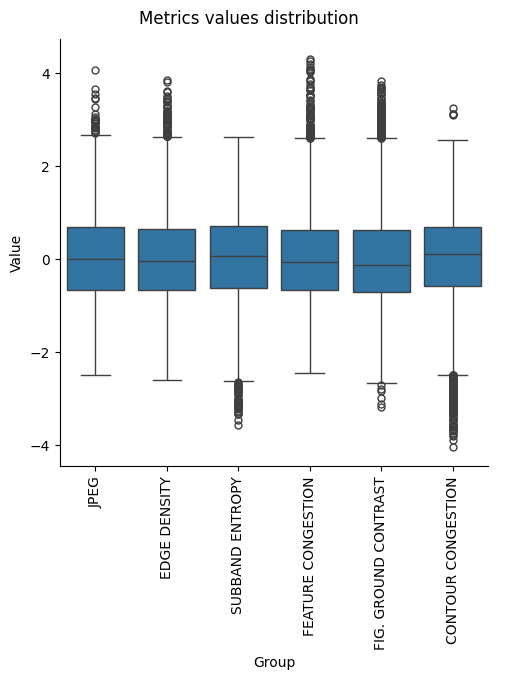

In [ ]:
#Check the distribution of the values with a boxplot
plt.figure(figsize=(10, 6))
g=sns.catplot(x='Metric',
              y='Value',
              kind='box',
              data=melted_df)

# Adding labels and title
g.fig.suptitle("Metrics values distribution",
               y=1.03)
g.set(xlabel='Group')
g.set(ylabel='Value')
plt.xticks(rotation=90)

# Show plot
plt.show()

+ ++ JPEG_size + cluttered
+ ++ COUNTOUR DENSITY ++ cluttered
+ ++ FEATURE_CONGESTION ++ cluttered
+ ++ SUBBAND_ENTROPY -- cluttered
+ ++ FIG_GROUND -- cluttered
+ ++ CONTOUR_CONGESTION ++ cluttered



<Figure size 2000x1200 with 0 Axes>

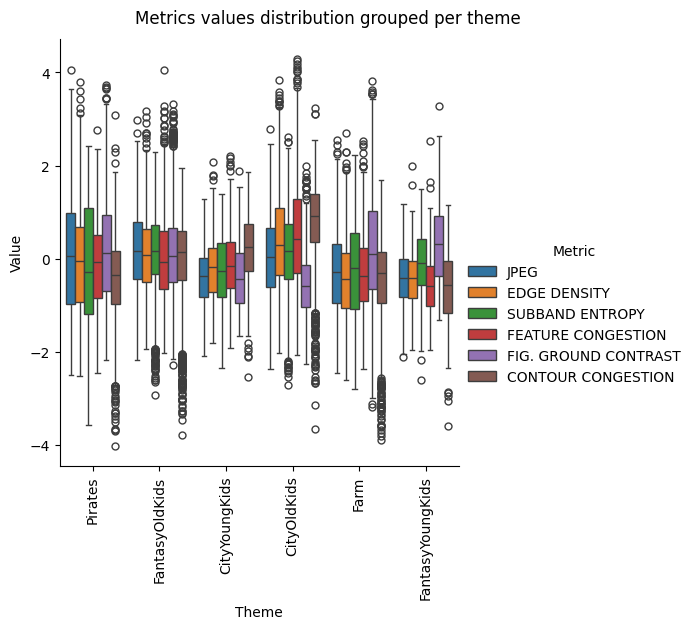

In [ ]:
# Now we do the same but separating by theme

plt.figure(figsize=(20, 12))

g=sns.catplot(x='theme',
              y='Value',
              kind='box',
              hue='Metric',
              data=melted_df)

# Adding labels and title
g.fig.suptitle("Metrics values distribution grouped per theme",
               y=1.03)
g.set(xlabel='Theme')
g.set(ylabel='Value')
plt.xticks(rotation=90)

# Show plot
plt.show()

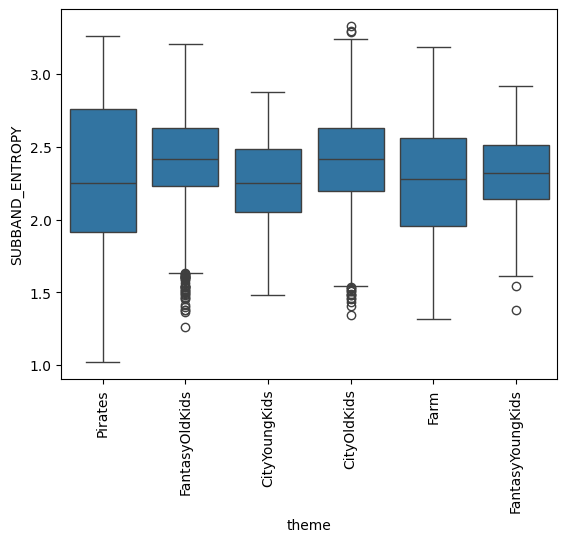

In [ ]:
# Boxplot
sns.boxplot(x="theme", y="SUBBAND_ENTROPY", data=merged_df)
plt.xticks(rotation=90)
plt.show()

<Figure size 1000x600 with 0 Axes>

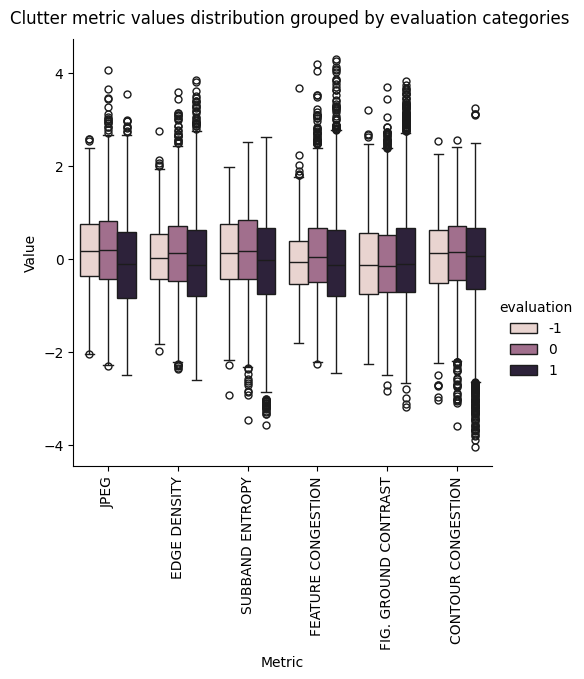

In [ ]:
# Now separating by evaluation

plt.figure(figsize=(10, 6))
g=sns.catplot(x='Metric',
              y='Value',
              hue='evaluation',
              kind='box',
              data=melted_df)

# Adding labels and title
g.fig.suptitle("Clutter metric values distribution grouped by evaluation categories",
               y=1.03)
g.set(xlabel='Metric')
g.set(ylabel='Value')
plt.xticks(rotation=90)

# Show plot
plt.show()

## **Exploratory visualization**

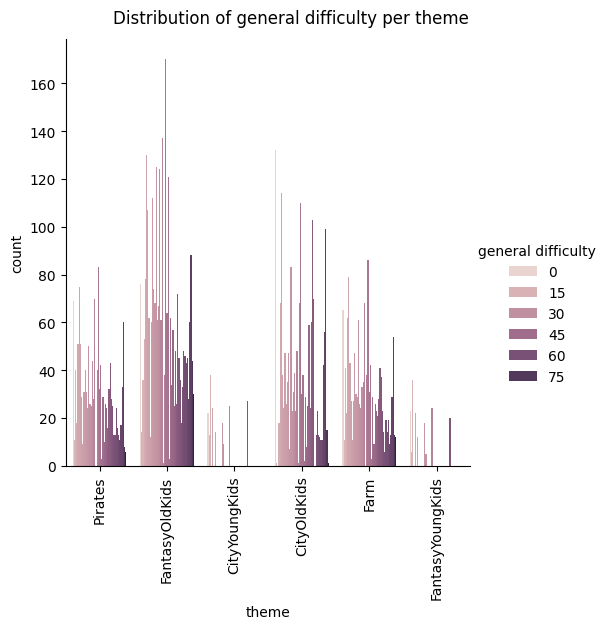

In [ ]:
# Distribution of difficulty and evaluation results per theme

g= sns.catplot(x="theme",
               data=df_copy, hue="general difficulty",
               kind="count")
g.fig.suptitle("Distribution of general difficulty per theme",
               y=1.03)
plt.xticks(rotation=90)
plt.show()

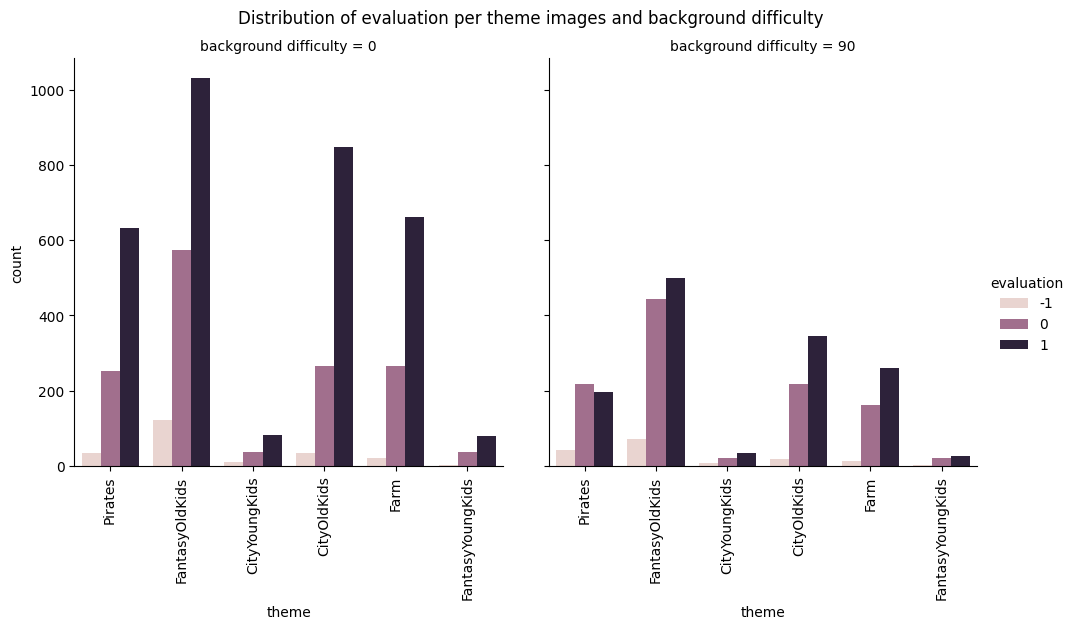

In [ ]:
g= sns.catplot(x="theme",
               data=df_copy, hue="evaluation", col="background difficulty",
               kind="count")
g.fig.suptitle("Distribution of evaluation per theme images and background difficulty",
               y=1.03)
g.set_xticklabels(rotation=90)
plt.show()

**Observations**:

1.   In 0 difficulty, the positive evaluations are always higher. In 90 difficulty, the positive evaluations are lower for 'Pirates'.
2.   Class imbalance: much less number of -1 labels compared to 0 and 1.



##  **Ratio of negative evaluations corresponding to the images above the 95th percentile of each clutter metric, againts the total number of negative evaluations.**

We have previously calculted the mean of each metric per evaluation results. Now we will focus on the uppear and lower limits.

In [ ]:
merged_df.head()

,id,JPEG_size,CONTOUR_DENSITY,SUBBAND_ENTROPY,FEATURE_CONGESTION,FIG_GROUND,CONTOUR_CONGESTION,start_date,end_date,wrong_selection,...,min_distance_from_border,min_size,max_size,earned_stars,max_stars_possible,ended_early,general_difficulty,adaptive,duration,background_difficulty
0,1000698,143042,0.0189,2.5820,3.1051,0.7330,0.5545,2022-05-11 09:51:53,2022-05-11 09:52:56,0,...,71,86,215,21,24,f,24,0,63,0
1,1006767,133233,0.0172,2.4407,2.7650,0.7064,0.5636,2022-05-11 13:09:44,2022-05-11 13:12:23,44,...,71,100,180,14,27,f,62,1,159,90
2,1012303,153711,0.0218,2.9606,3.2066,0.7015,0.4331,2022-05-12 14:59:50,2022-05-12 15:01:01,1,...,71,100,180,24,27,f,62,1,71,90
3,1055102,139979,0.0203,2.6423,2.6218,0.6787,0.5858,2022-05-19 15:09:28,2022-05-19 15:10:28,3,...,71,100,180,13,24,f,62,1,60,90
4,1087085,108292,0.0130,2.3357,2.4241,0.6778,0.4967,2022-05-24 13:41:07,2022-05-24 13:41:50,1,...,143,100,180,15,18,f,34,1,43,90


In [ ]:
# Grouping by the categorical variable (evaluation) and then computing on the numeric variables (metrics)
stats_metrics =  merged_df.groupby('evaluation')[metrics].quantile(0.95)
print(stats_metrics)

            JPEG_size  CONTOUR_DENSITY  SUBBAND_ENTROPY  FEATURE_CONGESTION  \
evaluation                                                                    
-1           153223.6           0.0219          2.94277            3.035255   
 0           157476.6           0.0226          2.95074            3.164100   
 1           150123.0           0.0226          2.91286            3.240260   

            FIG_GROUND  CONTOUR_CONGESTION  
evaluation                                  
-1             0.80297             0.62176  
 0             0.80550             0.62662  
 1             0.82434             0.62230  


In [ ]:
#Count the number of negative evaluations in the dataset
neg_ev = merged_df[merged_df['evaluation'] == -1]['evaluation'].count()
neut_ev = merged_df[merged_df['evaluation']== 0]['evaluation'].count()
pos_ev = merged_df[merged_df['evaluation'] == 1]['evaluation'].count()

print(f"Number of -1's: {neg_ev}")
print(f"Number of 0's: {neut_ev}")
print(f"Number of 1's: {pos_ev}")

Number of -1's: 372
Number of 0's: 2509
Number of 1's: 4693


In [ ]:
def calculate_negative_evaluation_ratios(df, metric, threshold_quantile):
    '''
    Calculate the ratio of negative evaluations (evaluation <= 0) in and above the 95th percentile of each metric, except
    for the 'FIG_GROUND' metric, in which case it is calculated in and below the 5th percentile.
    '''

    # Filter the the metric values above or below the speficied quantile
    if metric == 'FIG_GROUND':
      filtered_metric = df[df[metric] <= quantile_threshold]
    else:
      filtered_metric = df[df[metric] >= quantile_threshold]


    # Count the number of negative evaluations (evaluation == -1) and both negative and neutral
    # evaluations (evaluation <= 0) in the filtered metric
    negative_evaluation_count = filtered_metric[filtered_metric['evaluation'] == -1]['evaluation'].count()
    negative_neutral_evaluation_count = filtered_metric[filtered_metric['evaluation'] <= 0]['evaluation'].count()

    # Number of outliers:
    outliers_count = len(filtered_metric)

    # Ratio of negative evaluations in outliers/ total of outliers images
    ratio =  negative_evaluation_count / outliers_count

    # Ratio of negative and neutral evaluations in outliers/ total of aoutliers
    ratio_above_zero =  negative_neutral_evaluation_count/outliers_count

    # Ratio of negative evaluations in outliers/ total of negative evaluations in the dataset
    ratio_neg = negative_evaluation_count / neg_ev

    # Ratio of negative and neutral evaluations in outliers/ total of negative and neutral evaluations in the dataset
    ratio_neg_neut = negative_neutral_evaluation_count / (neg_ev + neut_ev)

    # Ratio of negative evaluations in outliers/ total of samples
    ratio_neg_tot = negative_evaluation_count/ len(df)

    # Ratio of negative and neutral evaluations in outliers/ total of samples
    ratio_neg_neut_tot = negative_neutral_evaluation_count/len(df)


    # Return the results
    return outliers_count, negative_evaluation_count, negative_neutral_evaluation_count, ratio, ratio_above_zero, ratio_neg, ratio_neg_neut, ratio_neg_tot, ratio_neg_neut_tot

In [ ]:
#Iterate over each metric and calculate the ratios
for metric in metrics:
  #Define the quantile threshold
  if metric == 'FIG_GROUND':
    quantile_threshold = merged_df[metric].quantile(0.05)
  else:
    quantile_threshold = merged_df[metric].quantile(0.95)

# Call the function and print the result
  outliers_count, negative_evaluation_count, negative_neutral_evaluation_count, ratio, ratio_above_zero, ratio_neg, ratio_neg_neut,ratio_neg_tot,  ratio_neg_neut_tot = calculate_negative_evaluation_ratios(merged_df, metric, quantile_threshold)

  print(f"Info for {metric} :\n Number of outliers: {outliers_count}, \n Negative count: {negative_evaluation_count}, Negative and neutral count:{negative_neutral_evaluation_count}\n Ratio of negative evaluations in outliers/ total outliers images: {ratio:.3f}\n Ratio of negative and neutral evaluations in outliers/ total outliers images: {ratio_above_zero:.3f}\n Ratio negative evaluations in the outliers images/ total negative evaluations in the dataset:  {ratio_neg:.3f} \n Ratio of negative and neutral evaluations in the outlier images/ total negative and neutral evaluations in the dataset: {ratio_neg_neut:.3f}  \n Ratio negative in outliers/ negative among the total: {ratio_neg_tot:.3f} \n Ratio negative and neutral evaluations in outliers/ negative and neutral evaluations among the total: {ratio_neg_neut_tot:.3f}")



Info for JPEG_size :
 Number of outliers: 379, 
 Negative count: 20, Negative and neutral count:203
 Ratio of negative evaluations in outliers/ total outliers images: 0.053
 Ratio of negative and neutral evaluations in outliers/ total outliers images: 0.536
 Ratio negative evaluations in the outliers images/ total negative evaluations in the dataset:  0.054 
 Ratio of negative and neutral evaluations in the outlier images/ total negative and neutral evaluations in the dataset: 0.070  
 Ratio negative in outliers/ negative among the total: 0.003 
 Ratio negative and neutral evaluations in outliers/ negative and neutral evaluations among the total: 0.027
Info for CONTOUR_DENSITY :
 Number of outliers: 387, 
 Negative count: 13, Negative and neutral count:143
 Ratio of negative evaluations in outliers/ total outliers images: 0.034
 Ratio of negative and neutral evaluations in outliers/ total outliers images: 0.370
 Ratio negative evaluations in the outliers images/ total negative evaluati